# Configuration

In [3]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns
import spotipy
import spotipy.oauth2     as oauth2
import spotipy.util       as util


from pprint import pprint
import csv
import os


from matplotlib           import pyplot as plt 
from IPython.core.display import display, HTML

In [4]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

# Getting Dataframe

In [12]:
df_raw = pd.read_csv('../csv/a_tristeza_é_senhora.csv')
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3eFepXGITXNDXXHUNqouxi,https://open.spotify.com/track/3eFepXGITXNDXXH...,Shake Me Down,Cage The Elephant,Thank You Happy Birthday,False,54,211373,9,1,4,0.46,0.61,0.03,0.00,0.00,0.07,0.13,105.11
1,51pQ7vY7WXzxskwloaeqyj,https://open.spotify.com/track/51pQ7vY7WXzxskw...,Stairway to Heaven - 1990 Remaster,Led Zeppelin,Led Zeppelin IV,False,67,478173,7,1,4,0.35,0.34,0.03,0.57,0.01,0.18,0.21,84.20
2,6QHGyXR0m3PDStlyHN8dYK,https://open.spotify.com/track/6QHGyXR0m3PDStl...,Stay Alive,José González,Stay Alive (From The Secret Life Of Walter Mitty),False,16,266906,6,1,4,0.72,0.30,0.04,0.70,0.14,0.09,0.33,130.00
3,3usVf6rhG6vDjcodeavHde,https://open.spotify.com/track/3usVf6rhG6vDjco...,Sozinho - Live In Brazil / 1998,Caetano Veloso,Prenda Minha (Live),False,1,190496,11,0,3,0.48,0.28,0.19,0.63,0.00,0.91,0.53,83.74
4,0sTr29gwWE4wIxjMLytsOu,https://open.spotify.com/track/0sTr29gwWE4wIxj...,If You Believe,Sasha,Greatest Hits,False,42,239973,5,1,1,0.37,0.52,0.04,0.12,0.00,0.11,0.48,82.51


## Quick explanation:

* **Instrumentalness**: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
* **Acousticness**: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
* **Liveness**: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
* **Speechiness**: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
* **Energy**: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
* **Danceability**: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
* **Valence**: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

## Histograms

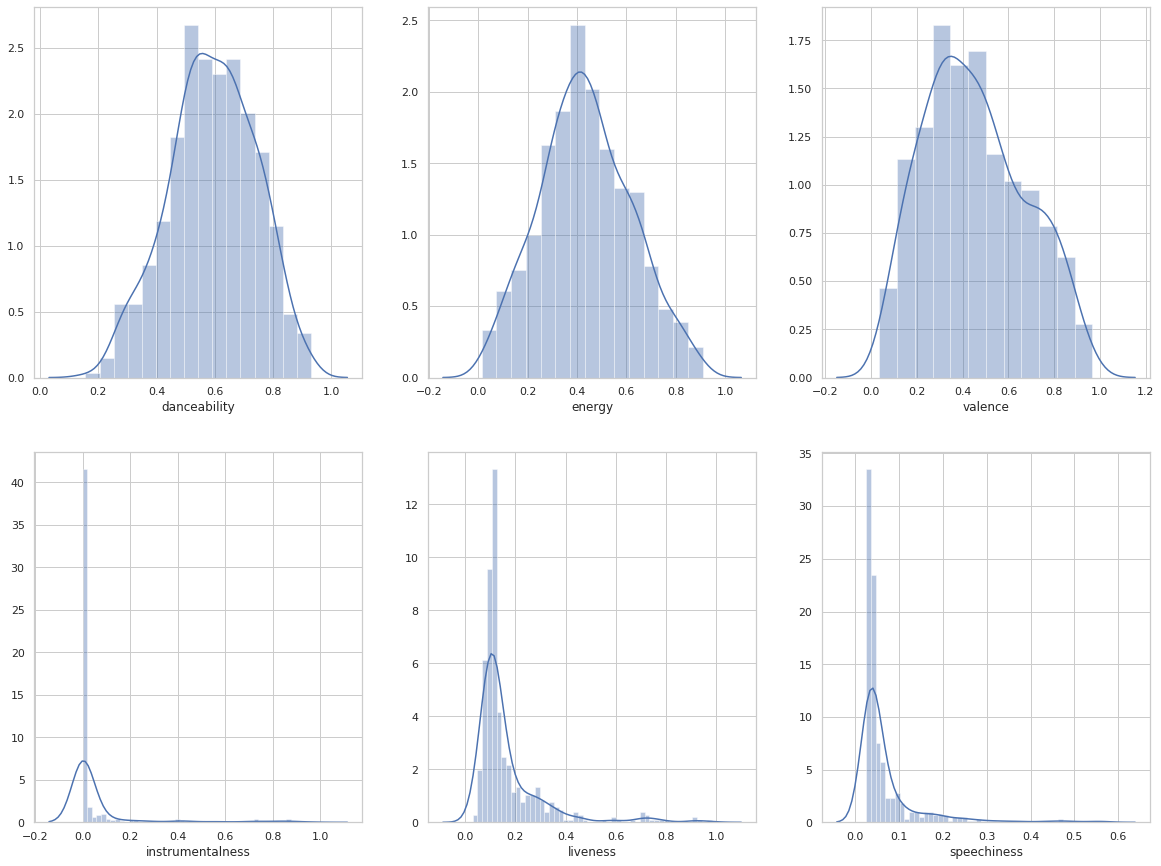

In [13]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.distplot(df_raw['danceability'], ax=axs[0,0])
sns.distplot(df_raw['energy'], ax=axs[0,1])
sns.distplot(df_raw['valence'], ax=axs[0,2])
sns.distplot(df_raw['instrumentalness'], ax=axs[1,0])
sns.distplot(df_raw['liveness'], ax=axs[1,1])
sns.distplot(df_raw['speechiness'], ax=axs[1,2])
plt.show()

## Boxplots

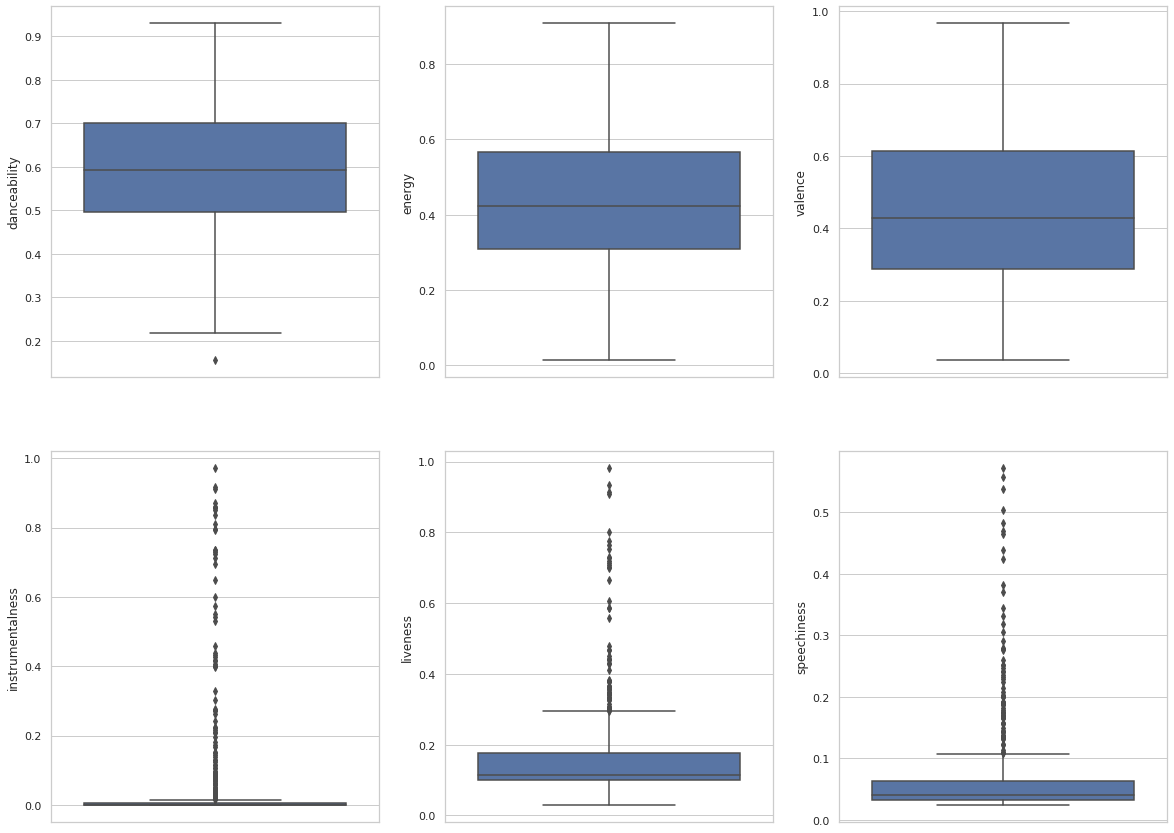

In [14]:
# Setting subplots
fig, axs = plt.subplots(2, 3)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
sns.boxplot(df_raw['danceability'], orient="v", ax=axs[0,0])
sns.boxplot(df_raw['energy'], orient="v", ax=axs[0,1])
sns.boxplot(df_raw['valence'], orient="v", ax=axs[0,2])
sns.boxplot(df_raw['instrumentalness'], orient="v", ax=axs[1,0])
sns.boxplot(df_raw['liveness'], orient="v", ax=axs[1,1])
sns.boxplot(df_raw['speechiness'], orient="v", ax=axs[1,2])
plt.show()

In [15]:
df_raw.describe()

,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00,556.00
mean,42.38,219743.38,5.13,0.65,3.88,0.59,0.44,0.07,0.54,0.05,0.17,0.45,114.21
std,22.84,59538.90,3.54,0.48,0.45,0.15,0.19,0.08,0.30,0.17,0.14,0.22,28.38
min,0.00,53454.00,0.00,0.00,1.00,0.16,0.01,0.02,0.00,0.00,0.03,0.04,58.10
25%,28.00,181549.50,2.00,0.00,4.00,0.50,0.31,0.03,0.27,0.00,0.10,0.29,90.36
50%,48.00,215839.50,5.00,1.00,4.00,0.59,0.42,0.04,0.57,0.00,0.11,0.43,112.06
75%,59.00,255551.75,8.00,1.00,4.00,0.70,0.57,0.06,0.80,0.01,0.18,0.61,131.32
max,86.00,478173.00,11.00,1.00,5.00,0.93,0.91,0.57,0.99,0.97,0.98,0.97,204.03


## Possibly offset music

In [16]:
df = df_raw.loc[(df_raw['energy'] > 0.57) & (df_raw['danceability'] > 0.70) & (df_raw['valence'] > 0.61)]
df

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
56,6q30SHZFgyyibMdrErLFaS,https://open.spotify.com/track/6q30SHZFgyyibMd...,Dilúvio de Solidão,Criolo,Espiral de Ilusão,False,0,157946,2,1,4,0.73,0.65,0.04,0.68,0.00,0.09,0.94,98.06
57,64ygSCb6X56Uu90GFji1Oo,https://open.spotify.com/track/64ygSCb6X56Uu90...,Menino Mimado,Criolo,Espiral de Ilusão,False,0,227546,0,0,4,0.83,0.60,0.04,0.59,0.00,0.20,0.82,143.94
58,3XQ4TLYm122Z10qObjtZ57,https://open.spotify.com/track/3XQ4TLYm122Z10q...,Nas Águas,Criolo,Espiral de Ilusão,False,0,235559,5,1,4,0.76,0.66,0.05,0.76,0.00,0.08,0.72,115.83
155,3y7ByLZ05tluscOTRgEJ9Y,https://open.spotify.com/track/3y7ByLZ05tluscO...,Palette (Feat. G-DRAGON),IU,Palette,False,66,217412,0,1,4,0.80,0.68,0.20,0.46,0.00,0.10,0.62,102.01
188,7CdEv0V9XkmPrIfSELPqGf,https://open.spotify.com/track/7CdEv0V9XkmPrIf...,Butterfly Dream,Turnover,Good Nature,False,35,207861,8,1,4,0.71,0.61,0.03,0.23,0.33,0.11,0.74,121.99
238,0KyAGiNGUytG5JLxJu4F6l,https://open.spotify.com/track/0KyAGiNGUytG5JL...,Pretty Girl,Clairo,Pretty Girl,False,75,178352,0,1,4,0.93,0.61,0.04,0.59,0.00,0.06,0.69,112.13
279,6tHWl8ows5JOZq9Yfaqn3M,https://open.spotify.com/track/6tHWl8ows5JOZq9...,Mine,Bazzi,Mine,True,12,133994,4,1,4,0.72,0.81,0.09,0.01,0.00,0.29,0.72,142.89
285,4plcy0Ax6tiHdeOapKX4bA,https://open.spotify.com/track/4plcy0Ax6tiHdeO...,High Tide,Sleep Good,Bohemian Grove,False,2,192866,5,1,4,0.73,0.77,0.04,0.67,0.97,0.09,0.83,125.91
325,1dN4Z7wZTQXLEl33RkMO3a,https://open.spotify.com/track/1dN4Z7wZTQXLEl3...,Text Me,DPR LIVE,Her,False,59,177342,5,0,4,0.85,0.59,0.28,0.15,0.00,0.26,0.76,134.02
345,4uToWVHXLtKEEboNsG3n2u,https://open.spotify.com/track/4uToWVHXLtKEEbo...,Egyptian Luvr (feat. Aminé and Dana Williams),Rejjie Snow,Dear Annie,True,61,256613,10,0,4,0.83,0.59,0.30,0.06,0.00,0.07,0.90,104.94


In [11]:
tracks = df['id'].tolist()
tracks

['1CRFWfZEfLCs7pYDlXFYMJ',
 '2cyTXelFvE7WjSAj8U5vvb',
 '1AhDOtG9vPSOmsWgNW0BEY',
 '5PK1JCSdr34gWgzYHgt3Jq',
 '0YBq701BXkMaK6V5UyvOpT',
 '3FGUAszpLN0pPh2jQL4vOv',
 '3zBvfeQ4RnDfAHQmvLflbk',
 '3DwN8YfAtvJh4c5u8DZPen',
 '1AqJft5Jpmc2ob71KRL562',
 '1cc0kyZrheNxOYPn3VoVEH',
 '3yShr5EC1pAAJcEOKj6h1R',
 '35LwnXpLMRb2kShTHmtPJ5',
 '4yoirlyne2EwkftLG7CpvN',
 '1Fid2jjqsHViMX6xNH70hE',
 '6WXFVBiQCftOIPYcYXNsrM',
 '16i6f7yJWs1j67fxBjfc7z',
 '6FOyzhp375u8DapDyQqGTh',
 '1IycYHHYjKgxvB8AHCdu7O',
 '0GVuLQtPXFaL18ijEOqoAa',
 '0RoA7ObU6phWpqhlC9zH4Z',
 '23L5CiUhw2jV1OIMwthR3S',
 '0L6UCE1Y0KX3MF2AtxlntI',
 '4fDta9k8aRElUr8LalrWQx',
 '2ilm46mO1B10paauIyloxK',
 '7FZz3UM8mkMnUlBTHAPJXp',
 '1LIAdfyn3dtGOyD30Rd5lG',
 '5FiwJejLzaiLzX5iYpPJp9',
 '20NnMHULgUwaFcKBSzb2hN',
 '1ZS7vvlooIov0EFQMQiy3V',
 '1709FMK7A4ZfzXYXyVnFJR',
 '7EUEl5wJb8VI777UAUvRnH',
 '3dglCYsVMjPbDlU2CC9Vq7',
 '3SPcBPzvbmWLl8NU5efx4W',
 '1UmIWsuzcitp1VhsEKviJZ',
 '2aXDWWlbLUapMZnYNDErmv',
 '3fLqmaO4vvZpFZSZy52VMp',
 '36ylLzMtvJ2CItc7bN4TcF',
 